In [1]:
import os
from pathlib import Path
import pandas as pd
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import nltk
import time
import numpy as np

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

current_dir = Path(os.getcwd()).absolute()
data_dir = current_dir.joinpath('data')
file = data_dir.joinpath('spam.csv')

spam = pd.read_csv(file, encoding = 'Windows-1252')
cleanup_spam = {'v1':     {'spam': 1, 'ham': 0}}

[nltk_data] Downloading package stopwords to C:\Users\Kyle
[nltk_data]     Morris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
spam = spam.replace(cleanup_spam)

In [3]:
spam['text'] = spam['v2']
spam['class'] = spam['v1']

data = spam.drop(['v1', 'v2'], axis = 1)

In [4]:
data['class'].mean()

0.13406317300789664

In [5]:
data['len'] = [len(row) for row in data['text']]

In [6]:
def clean_text(text):
    
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) 
    text_tokens = word_tokenize(text)

    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    joined_text = (" ").join(tokens_without_sw)
    clean_text.counter += 1
    if (clean_text.length - clean_text.counter) % 100 == 0:
        elapsed = time.perf_counter() - clean_text.start
        remaining = clean_text.length - clean_text.counter
        print('Row: ', remaining, ' Completion: ', clean_text.counter / clean_text.length * 100, '%')
        timeleft = remaining / clean_text.counter * elapsed
        print('Time elapsed: ', elapsed, ' seconds.\nTime remaining: ', timeleft, 'seconds.')

    return joined_text
clean_text.start = time.perf_counter()
clean_text.elapsed = 0
clean_text.counter = 0
clean_text.length = len(data)
data['text'] = data.apply(lambda row: clean_text(str(row['text'])), axis = 1)

Row:  5500  Completion:  1.2921751615218953 %
Time elapsed:  10.637747099999999  seconds.
Time remaining:  812.6056812499999 seconds.
Row:  5400  Completion:  3.086862885857861 %
Time elapsed:  22.99288759999999  seconds.
Time remaining:  721.8697269767438 seconds.
Row:  5300  Completion:  4.881550610193827 %
Time elapsed:  33.66575739999999  seconds.
Time remaining:  655.9871846323528 seconds.
Row:  5200  Completion:  6.676238334529792 %
Time elapsed:  44.65632489999999  seconds.
Time remaining:  624.2281975268816 seconds.
Row:  5100  Completion:  8.470926058865757 %
Time elapsed:  55.65826449999999  seconds.
Time remaining:  601.3922647245761 seconds.
Row:  5000  Completion:  10.265613783201722 %
Time elapsed:  67.0442934  seconds.
Time remaining:  586.0515157342658 seconds.
Row:  4900  Completion:  12.060301507537687 %
Time elapsed:  76.9654627  seconds.
Time remaining:  561.2064988541667 seconds.
Row:  4800  Completion:  13.854989231873654 %
Time elapsed:  88.9334799  seconds.
Time

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], random_state=0)

In [8]:
spamdata = data[data['class'] == 1]
nonspamdata = data[data['class'] == 0]

spamlength = spamdata['len'].mean()
nonspamlength = nonspamdata['len'].mean()

In [9]:
data['class'].value_counts()

0    4825
1     747
Name: class, dtype: int64

In [10]:
spam_list = spamdata['text'].tolist()
spam_string = ""
for row in spam_list:
    spam_string += row

spam_string = spam_string.lower()
spam_string = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", spam_string).split()) 

nonspam_list = nonspamdata['text'].tolist()
nonspam_string = ""
for row in nonspam_list:
    nonspam_string += row

nonspam_string = nonspam_string.lower()
nonspam_string = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", nonspam_string).split()) 

In [11]:
nonspam_string

'go jurong point crazy available bugis great world buffet cine got amoreok lar joking wifu dun say early hor u already saynah i think goes usf lives around thougheven brother like speak they treat like aids patentas request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertunei gon home soon talk stuff anymore tonight i cried enough todayi searching right words thank breather i promise wont help granted fulfil promise you wonderful blessing timesi have a date on sunday with willoh watchingeh remember 2 spell yes he naughty make wetfine way feel that way gota bis seriously spelli going try 2 months jokingso pay first lar then stock cominaft finish lunch go str ard 3 smth u finish ur lunch alreadyffffffffff alright way i meet soonerjust forced eat slice i really hungry tho this sucks mark getting worried he knows i sick i turn pizza lollol always convincingdid catch bus are frying egg did make tea are eating mom left dinner do feel lovei ba

In [12]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(spam_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

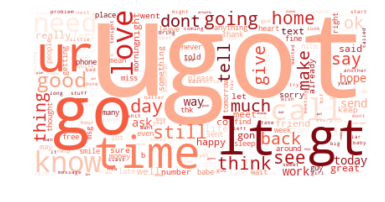

In [13]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(nonspam_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
print('rows in test set: ' + str(X_test.shape))
print('rows in train set: ' + str(X_train.shape))

rows in test set: (1393,)
rows in train set: (4179,)


In [15]:
xlist = X_train.tolist()
vectorizer = TfidfVectorizer(
    input= xlist)

features_train_transformed = vectorizer.fit_transform(xlist) 
features_test_transformed  = vectorizer.transform(X_test)

In [16]:
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
print('Multinomial NB accuracy: ', classifier.score(features_test_transformed, y_test) * 100, '%')

Multinomial NB accuracy:  96.33883704235463 %


In [18]:
test_labels = classifier.predict(features_test_transformed)

actuals = y_test.tolist()
predictions = test_labels
labels = ['ham', 'spam']

results = confusion_matrix(actuals, predictions)

[[1196    0]
 [  51  146]]


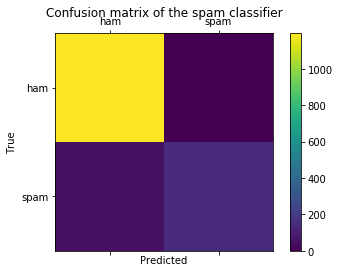

In [19]:

print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
print ('Accuracy Score :',accuracy_score(actuals, predictions))
print ('Report : ')
print (classification_report(actuals, predictions) )
score_2 = f1_score(actuals, predictions, average = 'binary')
print('F-Measure: %.3f' % score_2)

Accuracy Score : 0.9633883704235463
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1196
           1       1.00      0.74      0.85       197

   micro avg       0.96      0.96      0.96      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.96      0.96      0.96      1393

F-Measure: 0.851


In [21]:
def add_feature(X, feature):


    return hstack([X, csr_matrix(feature).T], 'csr')
vectorizer = TfidfVectorizer(min_df=5, ngram_range=[1,3])
X_train_transformed = vectorizer.fit_transform(X_train)
X_train_transformed_with_length = add_feature(X_train_transformed, [X_train.str.len(),
                                                                    X_train.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

X_test_transformed = vectorizer.transform(X_test)
X_test_transformed_with_length = add_feature(X_test_transformed, [X_test.str.len(),
                                                                  X_test.apply(lambda x: len(''.join([a for a in x if a.isdigit()])))])

In [22]:
log = LogisticRegression(C = 100)

log.fit(X_train_transformed_with_length, y_train)

y_predicted = log.predict(X_test_transformed_with_length)

roc_auc_score(y_test, y_predicted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9666167258034396

[[1189    7]
 [  12  185]]


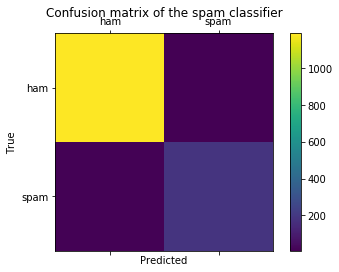

In [23]:
results = confusion_matrix(y_test, y_predicted)
print(results)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(results)
plt.title('Confusion matrix of the spam classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
print ('Accuracy Score :',accuracy_score(y_test, y_predicted))
print ('Report : ')
print (classification_report(y_test, y_predicted) )
score_2 = f1_score(y_test, y_predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Accuracy Score : 0.9863603732950467
Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1196
           1       0.96      0.94      0.95       197

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393

F-Measure: 0.951


In [25]:
nonspamlength

71.62818652849741

In [26]:
spamlength

139.15127175368139